In [4]:
from scipy.stats import norm

import numpy as np
import scipy as sp
from pandas.core import datetools as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk


In [42]:
## 이항확률 분포
N = 100
theta = 0.35 # 귀무가설 앞면이 나온확률이 40번 
np.random.seed(0)
x = sp.stats.bernoulli(theta).rvs(N)
n = np.count_nonzero(x)

n

31

In [43]:
sp.stats.binom_test(n,N)

0.00018314322488235352

In [50]:
## 카테코리 분포의 카이 제곱 검정 

N = 10
k= 4
theta = np.array([0.8,0.2,0,0])
x = np.random.choice(k,N, p = theta)
n = np.bincount(x, minlength = k)
n 


array([8, 2, 0, 0], dtype=int64)

In [51]:
sp.stats.chisquare(n) ## p 벨류가 0.0006 정도로 채택 하기 힘들다 

Power_divergenceResult(statistic=17.199999999999999, pvalue=0.00064286025225389755)

In [53]:
## 단일 표본 z- 검정

N = 10
mu = 0
np.random.seed(0)
x = sp.stats.norm(mu).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [54]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [55]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

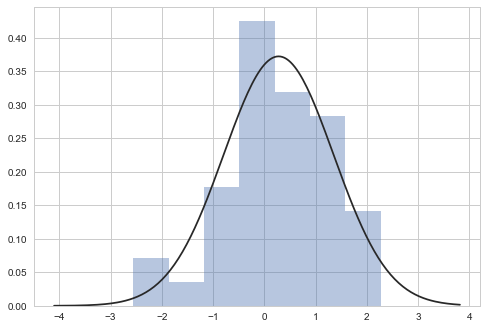

In [80]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

## 단일표본 t-검정 
N = 41
mu = 0
np.random.seed(0)
x = sp.stats.norm(mu).rvs(N)
sns.distplot(x,kde = False, fit=sp.stats.norm)
plt.show()

In [81]:
sp.stats.ttest_1samp(x,popmean = 0) ## N=41일 때 pvalue=0.107183 N<40 이하인경우 p벨류가 0.1 이하의 값이 나온다  

Ttest_1sampResult(statistic=1.6480174165435451, pvalue=0.10718324390186629)

In [83]:
sp.stats.t(df = 9).ppf(0.05) 
## 유의 수준 (양측검정) 10프로 일때 제일 작은 값 t 의 유의 수준은 5% 
## 그에 대한 t 값은 -1.8331129326536337

-1.8331129326536337

In [84]:
sp.stats.t(df = 99).ppf(0.005)

-2.6264054563851862

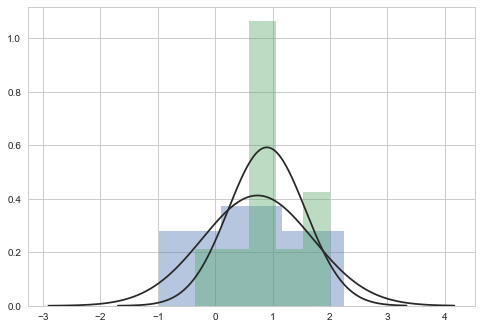

In [90]:
## 독립표본 t-검정 : 두학급의 평균이 같은지를 비교함 (두정규분포의 기댓값이 동일한지 확인 )
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [92]:
sp.stats.ttest_ind(x1,x2, equal_var= True) 
## 유의확률이 68.4 프로 , 그렇지만 mu1 != mu2 이므로 에러 
## 시행횟수가(예100) 커지면 p벨류가 작아지므로 에러가 적어진다 

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

In [123]:
a = [80, 85, 75, 80]
b = [85, 70, 80, 90]

#x1 = sp.stats.norm(np.mean(a))
#x2 = sp.stats.norm(np.mean(b))
# sp.stats.ttest_ind(x1,x2, equal_var= True) 
# sp.stats.ttest_ind(x1,x2) 
sp.stats.ttest_ind(a,b) ## 평균
sp.stats.ttest_rel(a,b) 

Ttest_relResult(statistic=-0.22549380840084865, pvalue=0.83608322580796268)

In [125]:
## uniform 분포
N = 3
np.random.seed(0)
sp.stats.uniform().rvs(N)

array([ 0.5488135 ,  0.71518937,  0.60276338])

In [131]:
x1 = sp.stats.shapiro(np.random.rand(5)-0.5) ## 박사님답 - Shapiro 정규성 테스트 - 확륣분포가 정규분포를 따르는지 확인 
x2 = sp.stats.shapiro(np.random.rand(5)-0.5)
x2 ## 첫번째값은 test statistics 값, 두번째 값은 p-value 값 - p값이 높으면 정규성을 따른다 

(0.9538570642471313, 0.7646925449371338)

In [134]:
sp.stats.ks_2samp(x1, x2) ## 84 프로로 유의 확률이 높으므로 정규성 검정에서 ok 
##이 중에서 Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않고 두 샘플이 같은 분포를 따르는지 확인할 수 있는 방법이다.

Ks_2sampResult(statistic=0.5, pvalue=0.84381982454156057)